## **SETUP**

In [4]:
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
scaler_input = StandardScaler()
scaler_output = StandardScaler()
import os
scaler_input = StandardScaler()
scaler_output = StandardScaler()

# **LOADING DATA**

In [5]:

SteadyState_Input = []

base_path = r'C:\\Users\\ismai\\OneDrive\\Desktop\\CFD Dissertation\\Files\\CSV training\\SteadyCSV'

transient_base_path = r'C:\\Users\\ismai\\OneDrive\\Desktop\\CFD Dissertation\\Files\\CSV training\\ML_OuputMaxV_CSV'

Transient_Output = []

for i in range(1, 41):  # Loop from N1 to N40
    # Construct the steady state file path
    steady_folder_name = f"N{i}Steady"
    steady_file_name = f"N{i}SPVS.csv"
    steady_file_path = os.path.join(base_path, steady_folder_name, steady_file_name)
    
    # Construct the transient file path (assuming a similar naming convention)
    transient_folder_name = f"N{i}"
    transient_file_name = f"N{i}TPV.csv"
    transient_file_path = os.path.join(transient_base_path, transient_folder_name, transient_file_name)

      
    NP = pd.read_csv(steady_file_path)
    NP = NP.replace(' null', 0)
    NPSteady_velocity = NP.iloc[:, 4].values.reshape(-1, 1)
    NPSteady_velocity = scaler_input.fit_transform(NPSteady_velocity)
    SteadyState_Input.append(NPSteady_velocity)

    # Process the transient CSV
    NT = pd.read_csv(transient_file_path)
    NT = NT.replace(' null', 0)
    NPTransient_velocity = NT.iloc[:, 4].values.reshape(-1, 1)
    NPTransient_velocity = scaler_output.fit_transform(NPTransient_velocity)
    Transient_Output.append(NPTransient_velocity)


# **MLP**

In [6]:
#https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
#https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
SteadyState_Input_MLP = np.concatenate(SteadyState_Input)
Transient_Output_MLP = np.concatenate(Transient_Output)
Steady_train, Steady_test, Transient_train, Transient_test = train_test_split(SteadyState_Input_MLP, Transient_Output_MLP, test_size=0.2, random_state=42)

# Initialize MLPRegressor

MLP = MLPRegressor(
    hidden_layer_sizes=(32, 64, 64),
    activation='relu',               
    solver='adam',                     
    alpha=0.0001,                      
    batch_size='auto',                 
    learning_rate_init=0.001,          
    max_iter=500,                      
    random_state=42                   
)
# Fit MLPRegressor
MLP.fit(Steady_train, Transient_train)

# Make predictions
TransientPredictions = MLP.predict(Steady_test)

# Now you can evaluate your model using any suitable metrics
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Transient_test, TransientPredictions)
print(f"Model performance:\nMSE: {mse}")

c:\Users\ismai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model performance:
MSE: 0.0699900191868983


# **PREDICTION**

In [9]:
# https://keras.io/api/models/model_training_apis/
SteadyState_New0 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N0\N0SPVS.csv')
SteadyState_New1 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N41\N41SPVS.csv')
SteadyState_New2 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N42\N42SPVS.csv')
SteadyState_New3 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N43\N43SPVS.csv')
SteadyState_New4 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N44\N44SPVS.csv')
SteadyState_New0 = SteadyState_New0.replace(' null', 0)
SteadyState_New1 = SteadyState_New1.replace(' null', 0)
SteadyState_New2 = SteadyState_New2.replace(' null', 0)
SteadyState_New3 = SteadyState_New3.replace(' null', 0)
SteadyState_New4 = SteadyState_New4.replace(' null', 0)
SteadyStateVelocity_0 = SteadyState_New0.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_1 = SteadyState_New1.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_2 = SteadyState_New2.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_3 = SteadyState_New3.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_4 = SteadyState_New4.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_0 = scaler_input.transform(SteadyStateVelocity_0 )
SteadyStateVelocity_1 = scaler_input.transform(SteadyStateVelocity_1 )
SteadyStateVelocity_2 = scaler_input.transform(SteadyStateVelocity_2 )
SteadyStateVelocity_3 = scaler_input.transform(SteadyStateVelocity_3 )
SteadyStateVelocity_4 = scaler_input.transform(SteadyStateVelocity_4 )
Prediction0 = MLP.predict(SteadyStateVelocity_0)
Prediction1 = MLP.predict(SteadyStateVelocity_1)
Prediction2 = MLP.predict(SteadyStateVelocity_2)
Prediction3 = MLP.predict(SteadyStateVelocity_3)
Prediction4 = MLP.predict(SteadyStateVelocity_4)
Prediction0 = scaler_output.inverse_transform(Prediction0.reshape(-1, 1))
Prediction1 = scaler_output.inverse_transform(Prediction1.reshape(-1, 1))
Prediction2 = scaler_output.inverse_transform(Prediction2.reshape(-1, 1))
Prediction3 = scaler_output.inverse_transform(Prediction3.reshape(-1, 1))
Prediction4 = scaler_output.inverse_transform(Prediction4.reshape(-1, 1))
SteadyState_New0 ['Transient Prediction 0'] = Prediction0
SteadyState_New1 ['Transient Prediction 1'] = Prediction1
SteadyState_New2 ['Transient Prediction 2'] = Prediction2
SteadyState_New3 ['Transient Prediction 3'] = Prediction3
SteadyState_New4 ['Transient Prediction 4'] = Prediction4
print(Prediction0)
print(Prediction1)
print(Prediction2)
print(Prediction3)
print(Prediction4)
SteadyState_New0.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N0M.csv', index=False)
SteadyState_New1.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N41M.csv', index=False)
SteadyState_New2.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N42M.csv', index=False)
SteadyState_New3.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N43M.csv', index=False)
SteadyState_New4.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N44M.csv', index=False)


[[0.46906763]
 [0.47289924]
 [0.46779043]
 ...
 [0.30251328]
 [0.25971276]
 [0.21341504]]
[[0.63375554]
 [0.47289924]
 [0.4915969 ]
 ...
 [0.20492272]
 [0.11229874]
 [0.02031248]]
[[0.4915969 ]
 [0.4915969 ]
 [0.49304279]
 ...
 [0.02031248]
 [0.02031248]
 [0.02031248]]
[[0.5535304 ]
 [0.54777361]
 [0.47928526]
 ...
 [0.02031248]
 [0.02031248]
 [0.02031248]]
[[0.5549696 ]
 [0.54489521]
 [0.557848  ]
 ...
 [0.02031248]
 [0.02031248]
 [0.14855066]]


# **RESULTS N0**

In [10]:
PredictedTransient0 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N0M.csv')
# Print column names
print(PredictedTransient0.columns)
PredictedTransient0 = PredictedTransient0.fillna(0)
PredictedTransient0 = PredictedTransient0.replace(' null', np.nan)
x = PredictedTransient0[' X [ m ]']
z = PredictedTransient0[' Z [ m ]']
ste_velocity = PredictedTransient0[' Velocity [ m s^-1 ]']
velocity = PredictedTransient0['Transient Prediction 0']
diff_ste = PredictedTransient0['Transient Prediction 0'] - PredictedTransient0[' Velocity [ m s^-1 ]']
CFDTransient0 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N0TMAX\N0TV.csv')
print(CFDTransient0.columns)
CFDTransient0 = CFDTransient0.fillna(0)
CFDTransient0 = CFDTransient0.replace(' null', np.nan)
x = CFDTransient0 [' X [ m ]']
z = CFDTransient0 [' Z [ m ]']
velocity_truth = CFDTransient0 [' Velocity [ m s^-1 ]']
diff_vel = PredictedTransient0['Transient Prediction 0'] - CFDTransient0[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 0'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


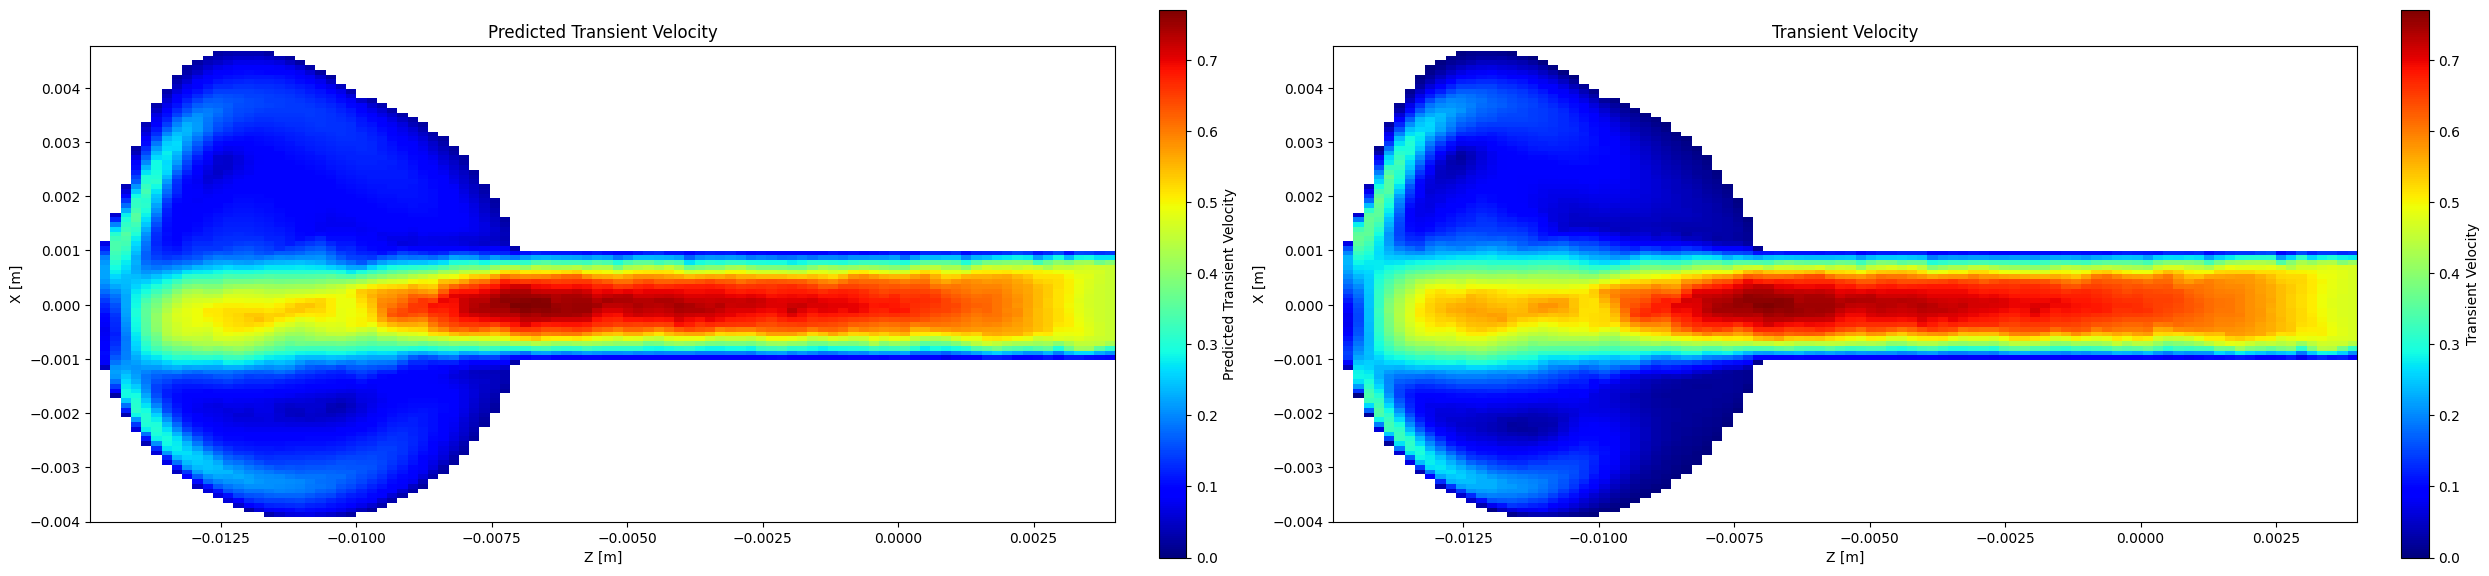

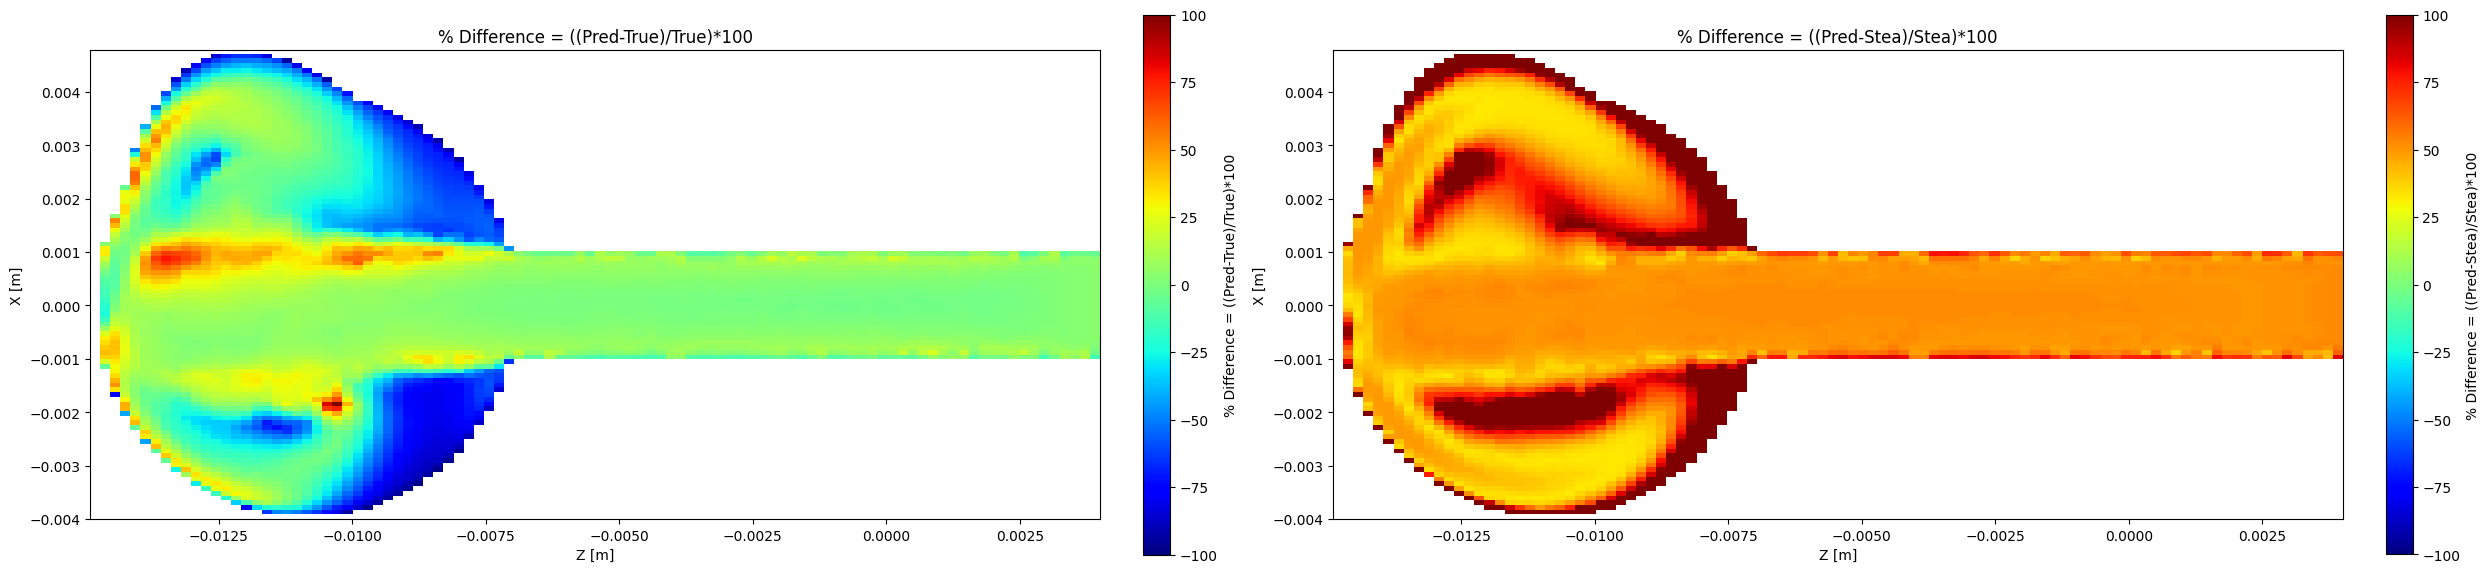

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities by 90 degrees and transpose
rotated_masked_velocity0 = np.transpose(np.rot90(masked_velocity0, 1))
rotated_masked_velocity1 = np.transpose(np.rot90(masked_velocity1, 1))
rotated_masked_velocity2 = np.transpose(np.rot90(masked_velocity2, 1))

# Generate heat maps for velocity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 25))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im1 = ax1.imshow(rotated_masked_velocity1, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.025, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("Z [m]")
ax1.set_ylabel("X [m]")

im2 = ax2.imshow(rotated_masked_velocity2, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.025, pad=0.04)
ax2.set_title('Transient Velocity')
ax2.set_xlabel("Z [m]")
ax2.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

# Calculate percentage differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(25, 25))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(percentage_change3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='% Difference = ((Pred-True)/True)*100', fraction=0.025, pad=0.04)
ax3.set_title('% Difference = ((Pred-True)/True)*100')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")

im4 = ax4.imshow(percentage_change4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='% Difference = ((Pred-Stea)/Stea)*100', fraction=0.025, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()



In [12]:
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

print(average_percentage_change3, 'and' ,average_percentage_change4)

max_velocity = np.max(Prediction0)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient0[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")

relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient0[' Velocity [ m s^-1 ]'], Prediction0)
print(r2)

19.057782371414213 and 67.76490365820358
Maximum velocity from the prediction is: 0.7777412830108953
Maximum velocity from the actual is: 0.773
% is: 0.6133613209437606
0.9707723203230201


# **RESULTS N41**

In [14]:
PredictedTransient1 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N41M.csv')
# Print column names
print(PredictedTransient1.columns)
PredictedTransient1 = PredictedTransient1.fillna(0)
PredictedTransient1 = PredictedTransient1.replace(' null', np.nan)
x = PredictedTransient1[' X [ m ]']
z = PredictedTransient1[' Z [ m ]']
ste_velocity1 = PredictedTransient1[' Velocity [ m s^-1 ]']
velocity1 = PredictedTransient1['Transient Prediction 1']
diff_ste1 = PredictedTransient1['Transient Prediction 1'] - PredictedTransient1[' Velocity [ m s^-1 ]']

CFDTransient1 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N41Tmax\N41TV.csv')
print(CFDTransient1.columns)
CFDTransient1 = CFDTransient1.fillna(0)
CFDTransient1 = CFDTransient1.replace(' null', np.nan)
x = CFDTransient1 [' X [ m ]']
z = CFDTransient1 [' Z [ m ]']
velocity_truth1 = CFDTransient1 [' Velocity [ m s^-1 ]']
diff_vel1 = PredictedTransient1['Transient Prediction 1'] - CFDTransient1[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 1'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


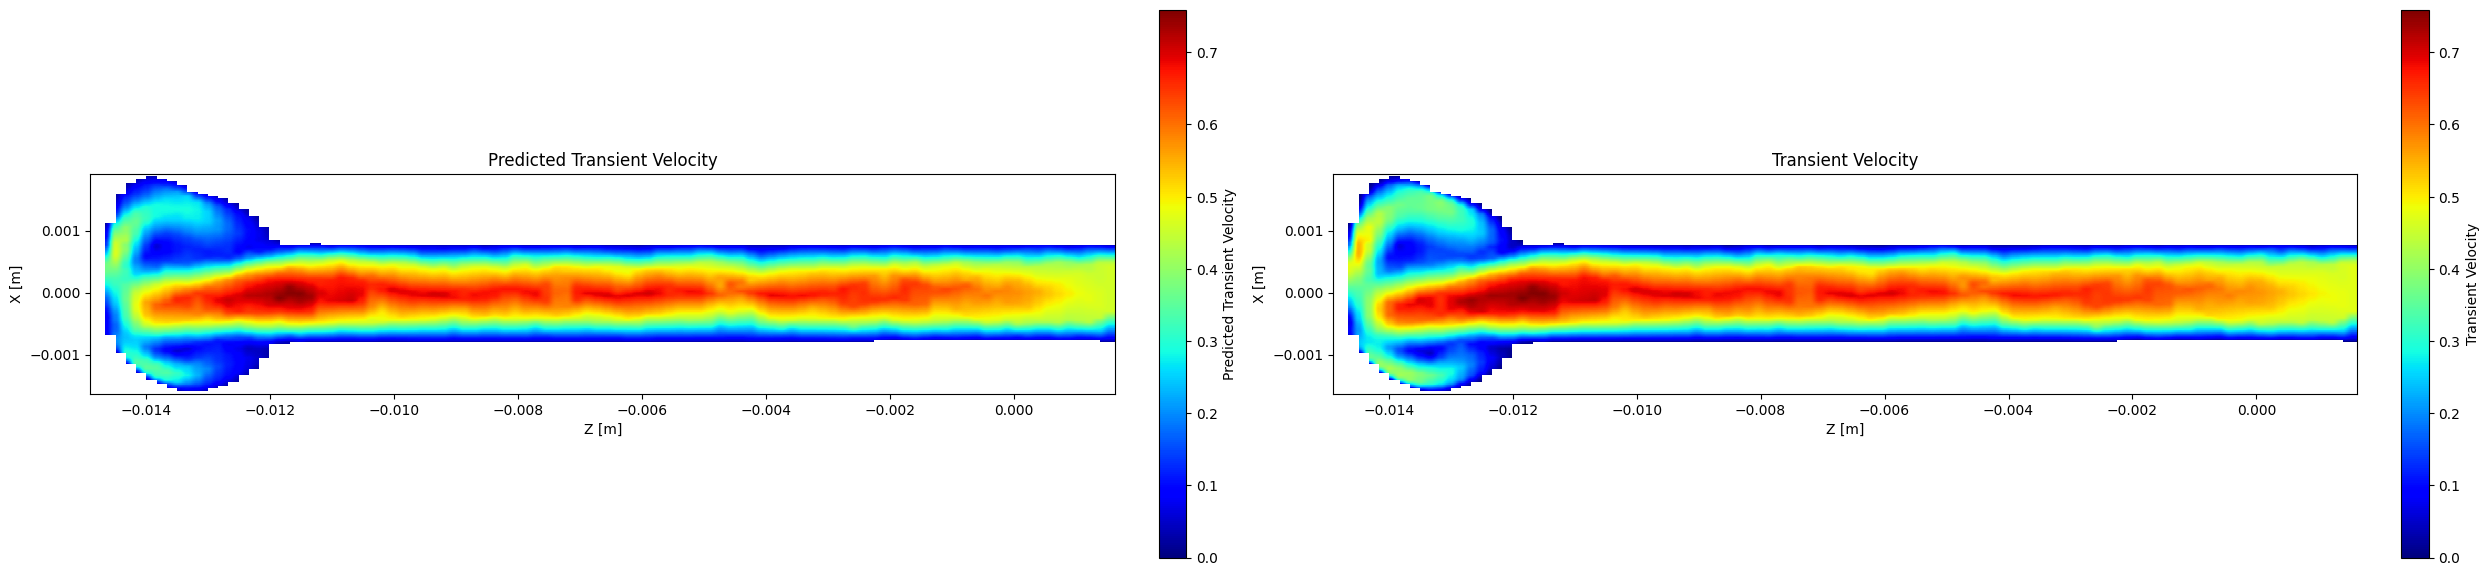

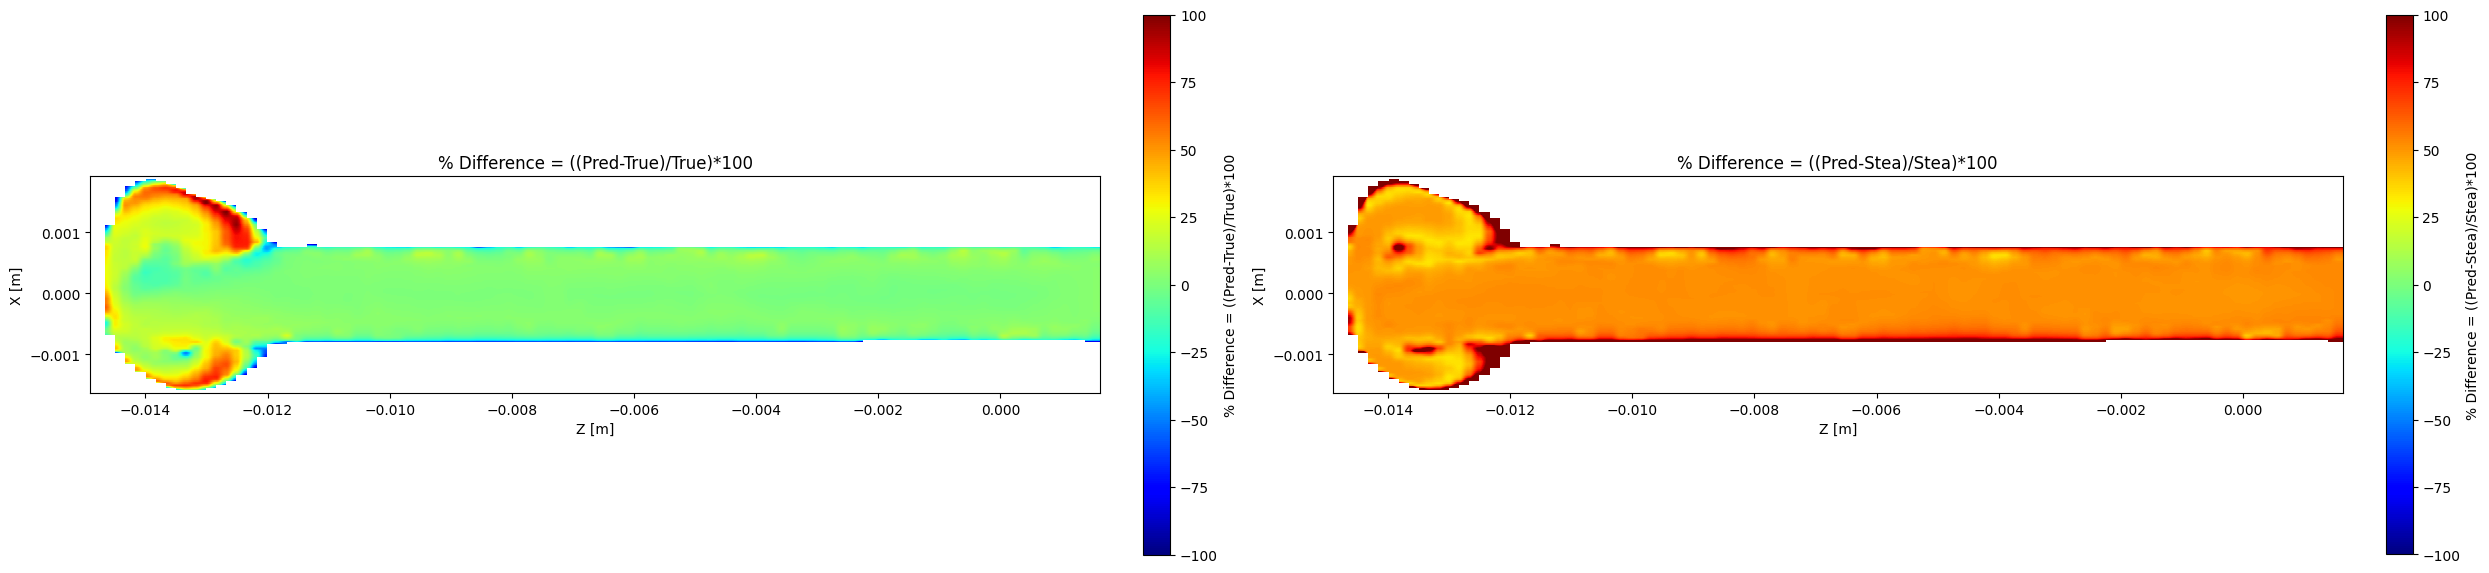

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity1, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity1, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth1, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel1, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste1, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities by 90 degrees and transpose
rotated_masked_velocity0 = np.transpose(np.rot90(masked_velocity0, 1))
rotated_masked_velocity1 = np.transpose(np.rot90(masked_velocity1, 1))
rotated_masked_velocity2 = np.transpose(np.rot90(masked_velocity2, 1))

# Generate heat maps for velocity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 25))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im1 = ax1.imshow(rotated_masked_velocity1, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.025, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("Z [m]")
ax1.set_ylabel("X [m]")

im2 = ax2.imshow(rotated_masked_velocity2, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.025, pad=0.04)
ax2.set_title('Transient Velocity')
ax2.set_xlabel("Z [m]")
ax2.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

# Calculate percentage differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(25, 25))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(percentage_change3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='% Difference = ((Pred-True)/True)*100', fraction=0.025, pad=0.04)
ax3.set_title('% Difference = ((Pred-True)/True)*100')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")

im4 = ax4.imshow(percentage_change4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='% Difference = ((Pred-Stea)/Stea)*100', fraction=0.025, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


In [16]:
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

print(average_percentage_change3, 'and', average_percentage_change4)

max_velocity = np.max(Prediction1)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient1[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")

relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient1[' Velocity [ m s^-1 ]'], Prediction1)
print(r2)

10.256798152320048 and 64.52608667677258
Maximum velocity from the prediction is: 0.7550335588964728
Maximum velocity from the actual is: 0.761
% is: 0.784026426219077
0.9509270954744842


# **RESULTS N42**

In [17]:
PredictedTransient2 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N42M.csv')
# Print column names
print(PredictedTransient2.columns)
PredictedTransient2 = PredictedTransient2.fillna(0)
PredictedTransient2 = PredictedTransient2.replace(' null', np.nan)
x = PredictedTransient2[' X [ m ]']
z = PredictedTransient2[' Z [ m ]']
ste_velocity2 = PredictedTransient2[' Velocity [ m s^-1 ]']
velocity2 = PredictedTransient2['Transient Prediction 2']
diff_ste2 = PredictedTransient2['Transient Prediction 2'] - PredictedTransient1[' Velocity [ m s^-1 ]']
CFDTransient2 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N42Tmax\N42TV.csv')
print(CFDTransient2.columns)
CFDTransient2 = CFDTransient2.fillna(0)
CFDTransient2 = CFDTransient2.replace(' null', np.nan)
x = CFDTransient2 [' X [ m ]']
z = CFDTransient2 [' Z [ m ]']
velocity_truth2 = CFDTransient2 [' Velocity [ m s^-1 ]']
diff_vel2 = PredictedTransient2['Transient Prediction 2'] - CFDTransient2[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 2'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


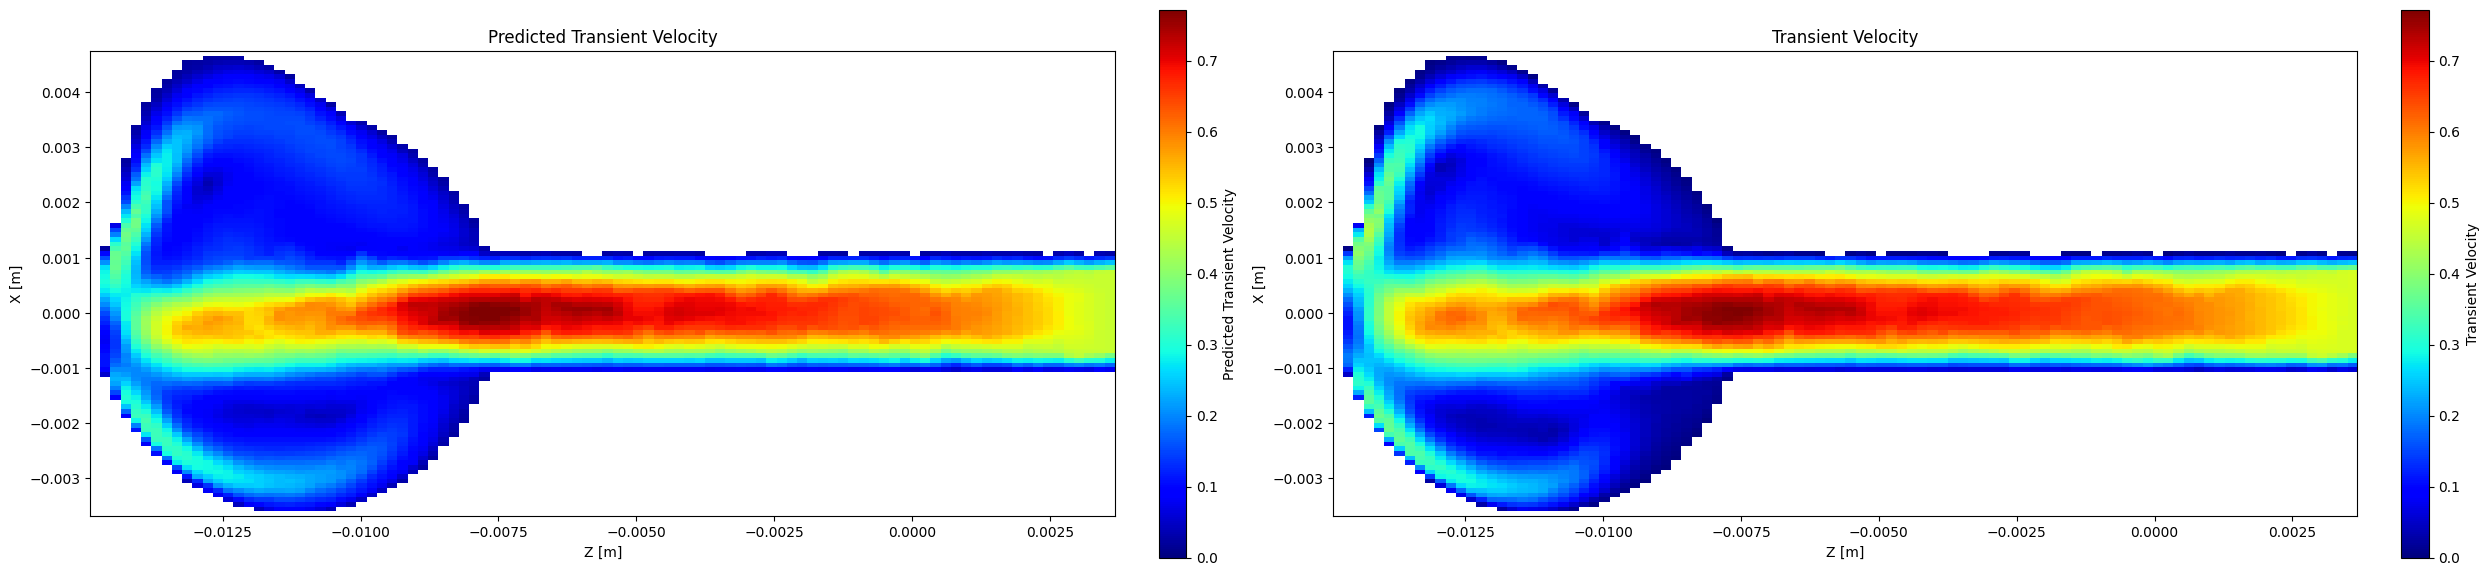

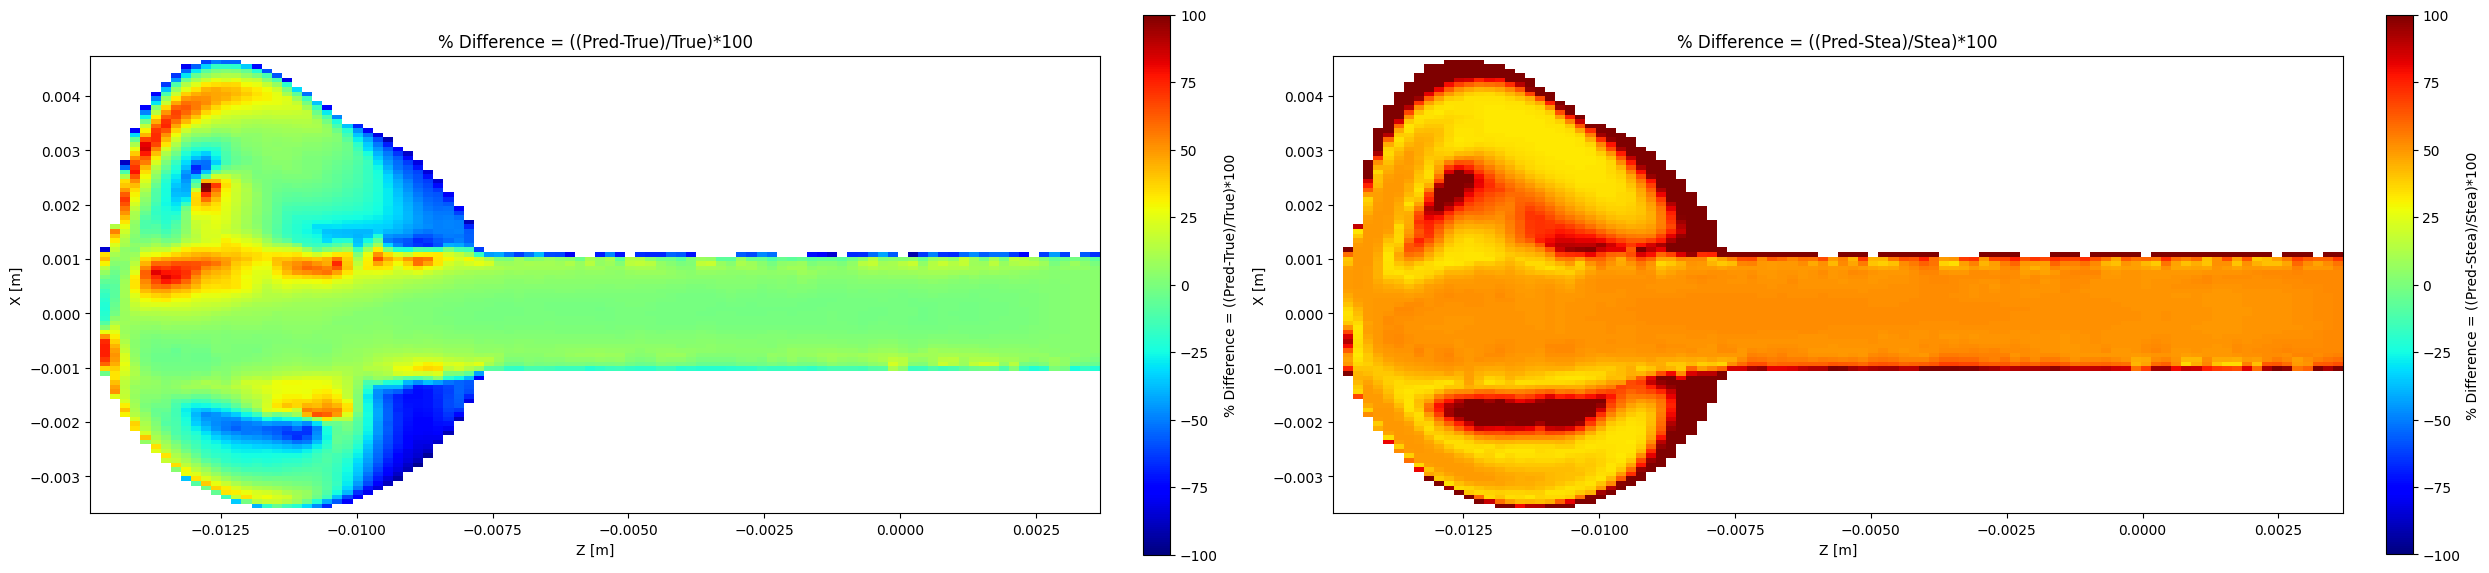

In [18]:

grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity2, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity2, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth2, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel2, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste2, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities by 90 degrees and transpose
rotated_masked_velocity0 = np.transpose(np.rot90(masked_velocity0, 1))
rotated_masked_velocity1 = np.transpose(np.rot90(masked_velocity1, 1))
rotated_masked_velocity2 = np.transpose(np.rot90(masked_velocity2, 1))

# Generate heat maps for velocity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 25))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im1 = ax1.imshow(rotated_masked_velocity1, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.025, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("Z [m]")
ax1.set_ylabel("X [m]")

im2 = ax2.imshow(rotated_masked_velocity2, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.025, pad=0.04)
ax2.set_title('Transient Velocity')
ax2.set_xlabel("Z [m]")
ax2.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

# Calculate percentage differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(25, 25))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(percentage_change3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='% Difference = ((Pred-True)/True)*100', fraction=0.025, pad=0.04)
ax3.set_title('% Difference = ((Pred-True)/True)*100')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")

im4 = ax4.imshow(percentage_change4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='% Difference = ((Pred-Stea)/Stea)*100', fraction=0.025, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


In [19]:
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

print(average_percentage_change3, 'and', average_percentage_change4)

max_velocity = np.max(Prediction2)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient2[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")

relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient2[' Velocity [ m s^-1 ]'], Prediction2)
print(r2)

17.144240648649173 and 68.27506182542494
Maximum velocity from the prediction is: 0.7837966761080748
Maximum velocity from the actual is: 0.774
% is: 1.2657204273998417
0.9646420863633727


# **RESULTS N43**

In [20]:
PredictedTransient3 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N43M.csv')
# Print column names
print(PredictedTransient3.columns)
PredictedTransient3 = PredictedTransient3.fillna(0)
PredictedTransient3 = PredictedTransient3.replace(' null', np.nan)
x = PredictedTransient3[' X [ m ]']
z = PredictedTransient3[' Z [ m ]']
ste_velocity3 = PredictedTransient3[' Velocity [ m s^-1 ]']
velocity3 = PredictedTransient3['Transient Prediction 3']
diff_ste3 = PredictedTransient3['Transient Prediction 3'] - PredictedTransient3[' Velocity [ m s^-1 ]']

CFDTransient3 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N43Tmax\N43TV.csv')
print(CFDTransient3.columns)
CFDTransient3 = CFDTransient3.fillna(0)
CFDTransient3 = CFDTransient3.replace(' null', np.nan)
x = CFDTransient3 [' X [ m ]']
z = CFDTransient3 [' Z [ m ]']
velocity_truth3 = CFDTransient3 [' Velocity [ m s^-1 ]']
diff_vel3 = PredictedTransient3['Transient Prediction 3'] - CFDTransient3[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 3'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


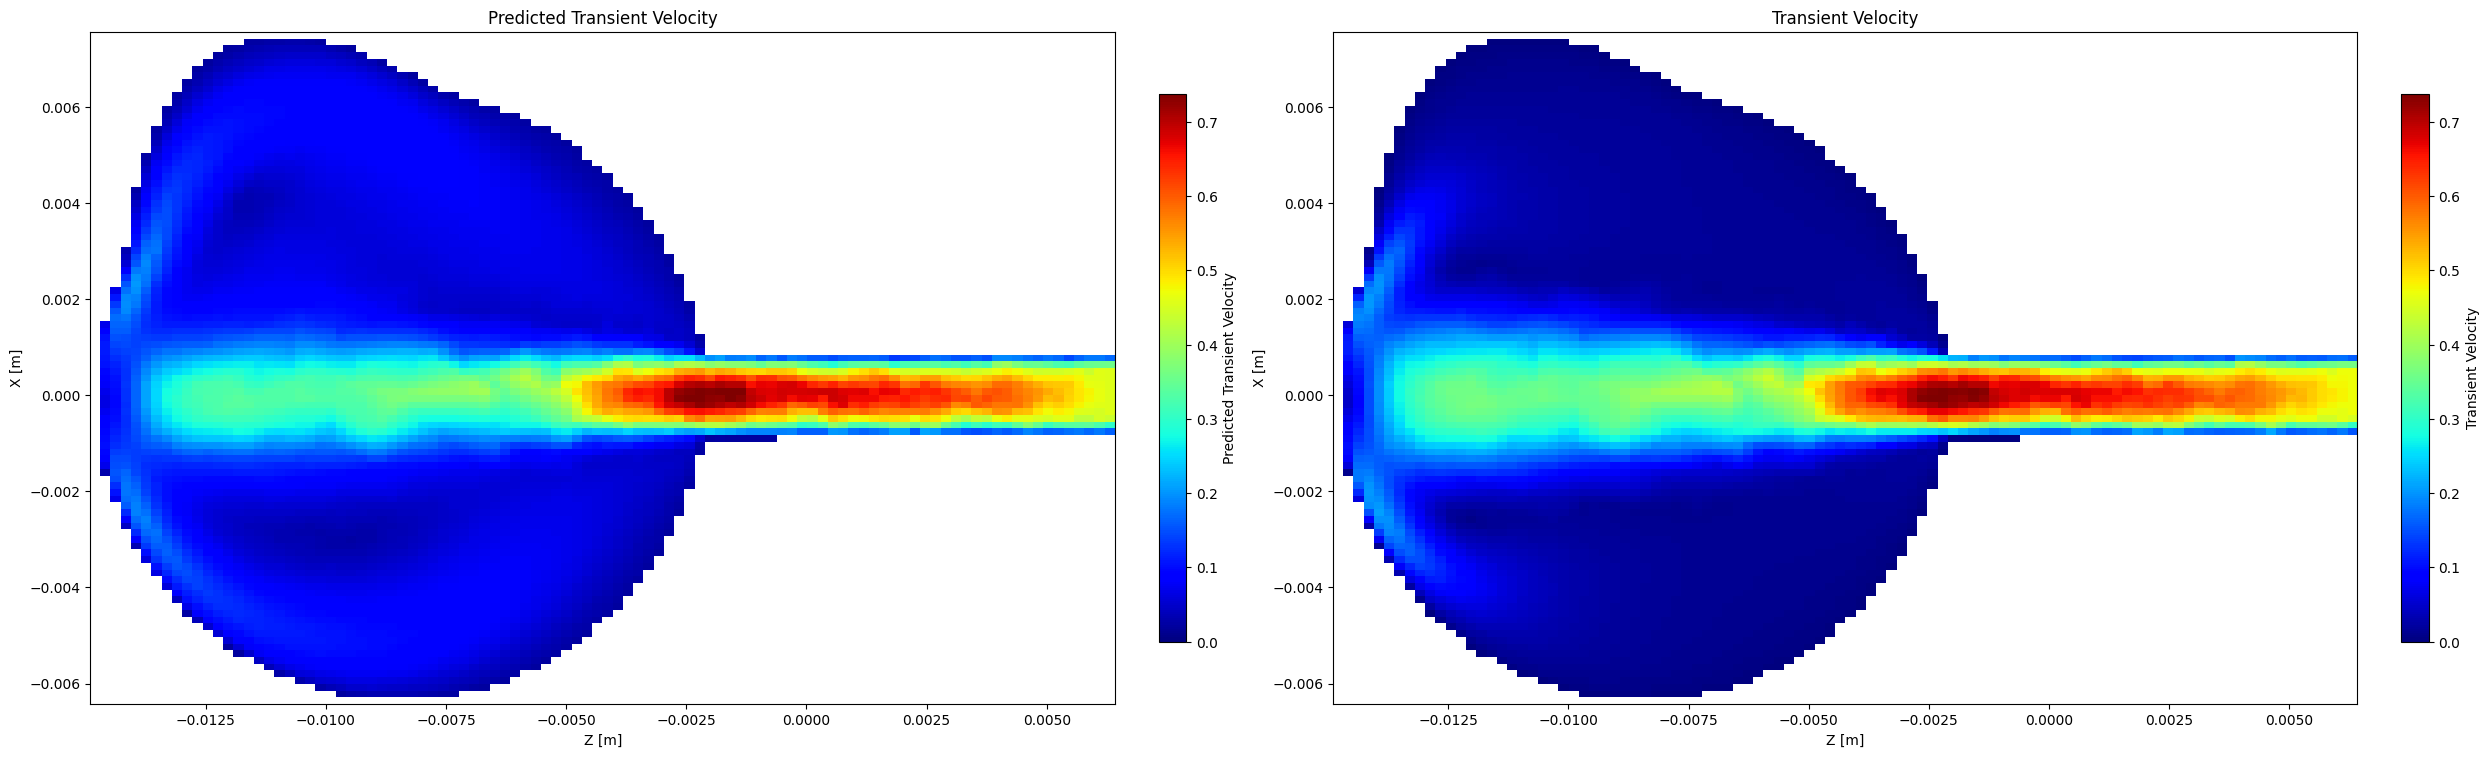

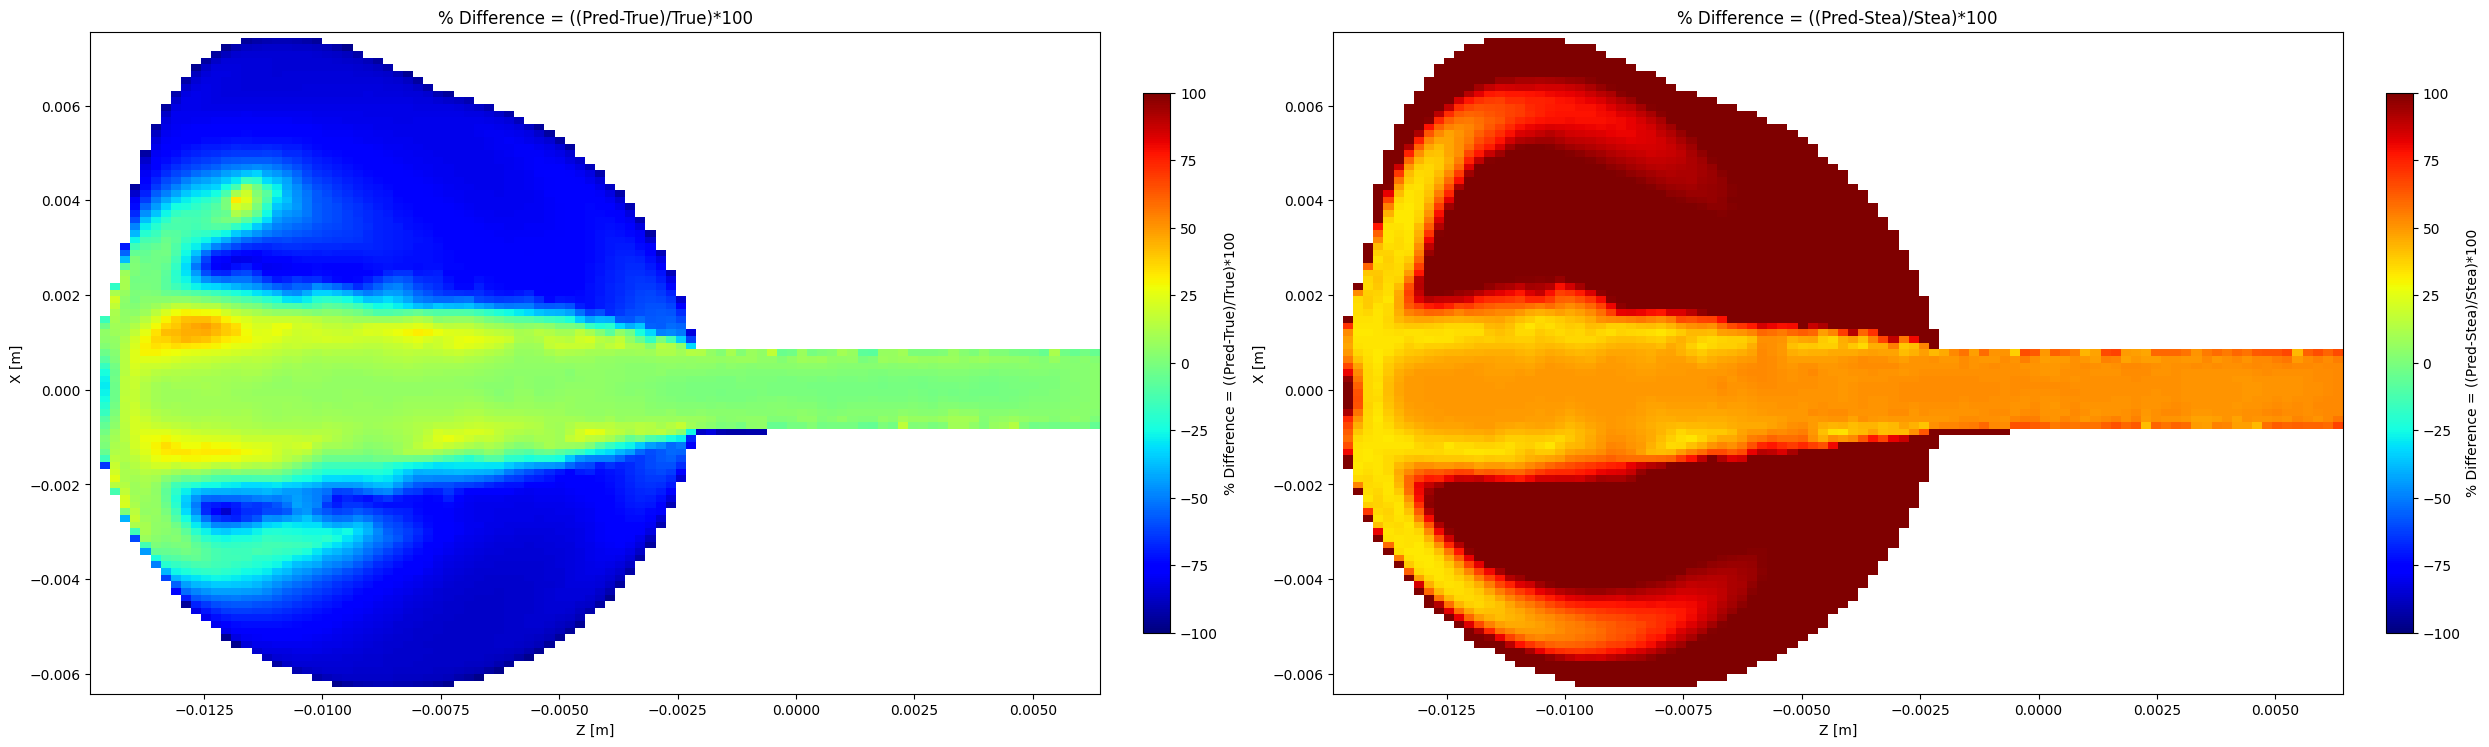

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity3, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity3, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth3, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel3, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste3, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities by 90 degrees and transpose
rotated_masked_velocity0 = np.transpose(np.rot90(masked_velocity0, 1))
rotated_masked_velocity1 = np.transpose(np.rot90(masked_velocity1, 1))
rotated_masked_velocity2 = np.transpose(np.rot90(masked_velocity2, 1))

# Generate heat maps for velocity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 25))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im1 = ax1.imshow(rotated_masked_velocity1, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.025, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("Z [m]")
ax1.set_ylabel("X [m]")

im2 = ax2.imshow(rotated_masked_velocity2, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.025, pad=0.04)
ax2.set_title('Transient Velocity')
ax2.set_xlabel("Z [m]")
ax2.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

# Calculate percentage differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(25, 25))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(percentage_change3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='% Difference = ((Pred-True)/True)*100', fraction=0.025, pad=0.04)
ax3.set_title('% Difference = ((Pred-True)/True)*100')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")

im4 = ax4.imshow(percentage_change4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='% Difference = ((Pred-Stea)/Stea)*100', fraction=0.025, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


In [22]:
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

print(average_percentage_change3, 'and', average_percentage_change4)

max_velocity = np.max(Prediction3)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity3 = CFDTransient3[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")

relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient3[' Velocity [ m s^-1 ]'], Prediction3)
print(r2)

44.99606562671683 and 119.11813685861189
Maximum velocity from the prediction is: 0.7489781657992935
Maximum velocity from the actual is: 0.774
% is: 3.2327951163703452
0.9363229913004936


# **RESULTS N44**

In [23]:
PredictedTransient4 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N44M.csv')
# Print column names
print(PredictedTransient4.columns)
PredictedTransient4 = PredictedTransient4.fillna(0)
PredictedTransient4 = PredictedTransient4.replace(' null', np.nan)
x = PredictedTransient4[' X [ m ]']
z = PredictedTransient4[' Z [ m ]']
ste_velocity4 = PredictedTransient4[' Velocity [ m s^-1 ]']
velocity4 = PredictedTransient4['Transient Prediction 4']
diff_ste4 = PredictedTransient4['Transient Prediction 4'] - PredictedTransient4[' Velocity [ m s^-1 ]']

CFDTransient4 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N44Tmax\N44TV.csv')
print(CFDTransient4.columns)
CFDTransient4 = CFDTransient4.fillna(0)
CFDTransient4 = CFDTransient4.replace(' null', np.nan)
x = CFDTransient4 [' X [ m ]']
z = CFDTransient4 [' Z [ m ]']
velocity_truth4 = CFDTransient4 [' Velocity [ m s^-1 ]']
diff_vel4 = PredictedTransient4['Transient Prediction 4'] - CFDTransient4[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', 'Transient Prediction 4'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


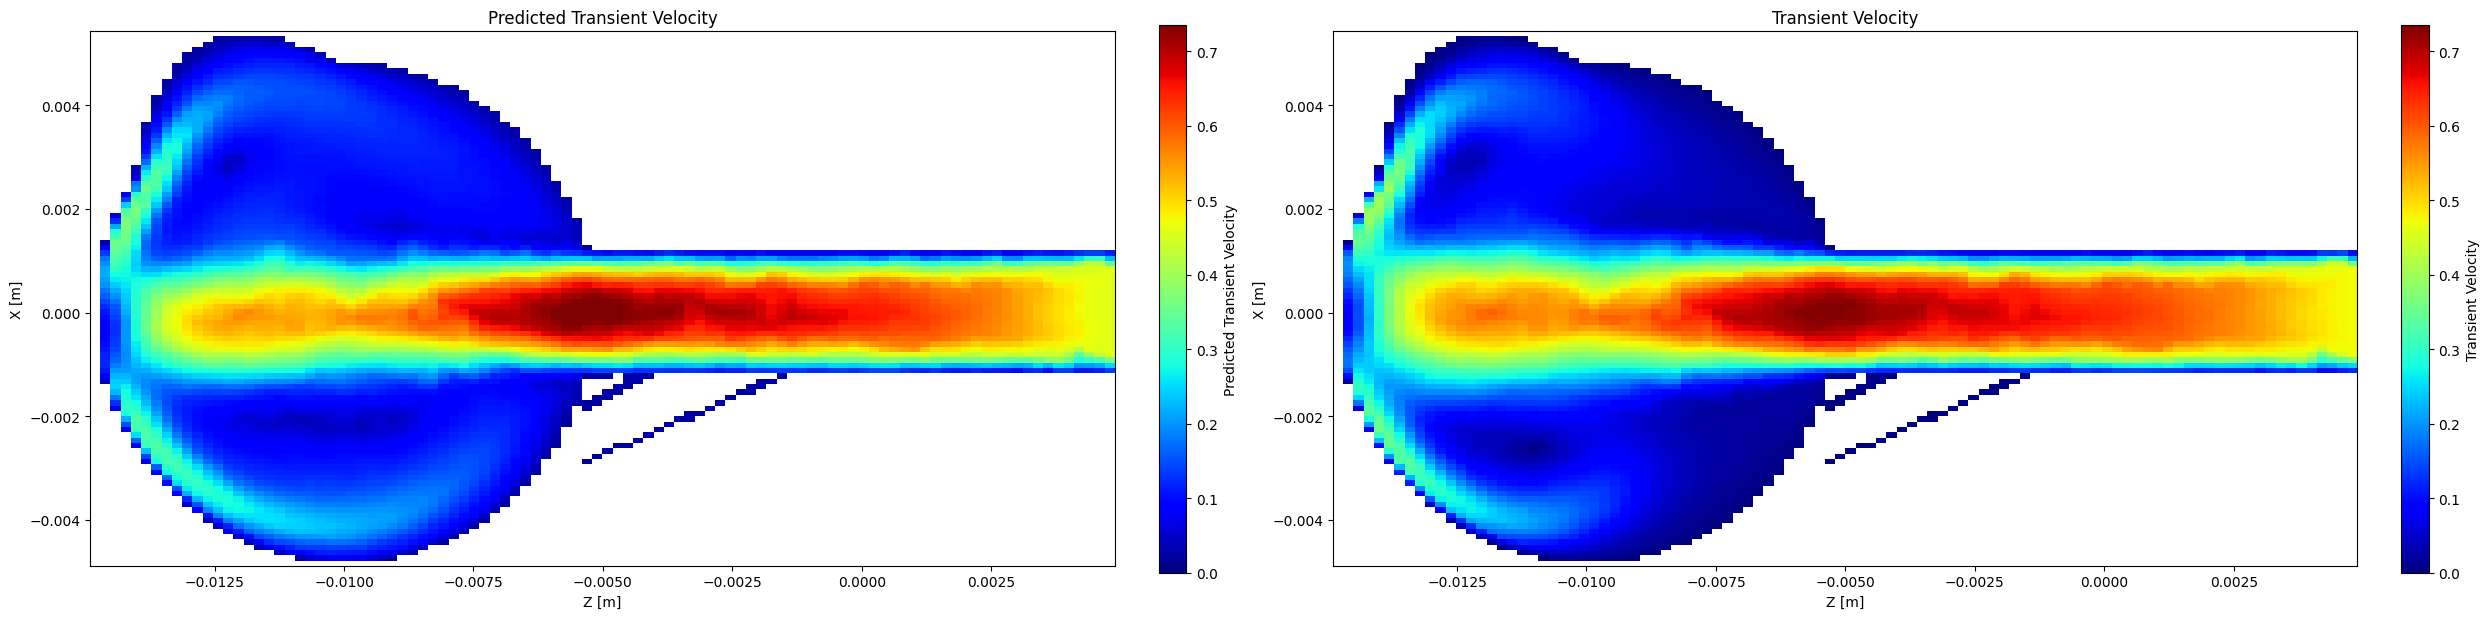

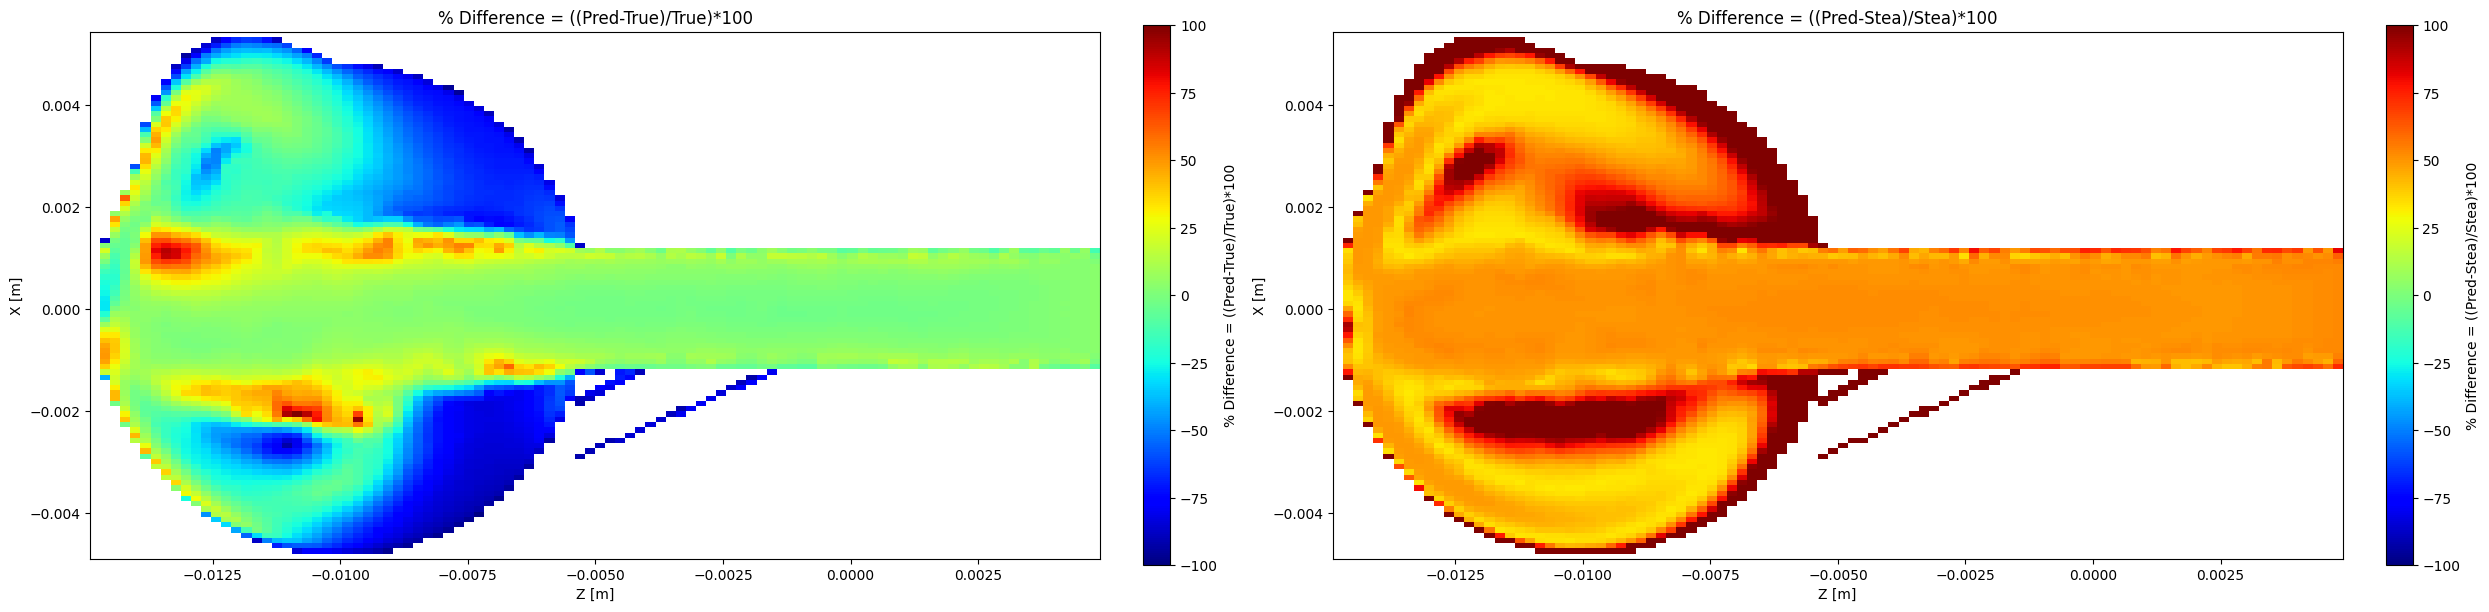

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity4, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity4, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth4, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel4, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste4, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities by 90 degrees and transpose
rotated_masked_velocity0 = np.transpose(np.rot90(masked_velocity0, 1))
rotated_masked_velocity1 = np.transpose(np.rot90(masked_velocity1, 1))
rotated_masked_velocity2 = np.transpose(np.rot90(masked_velocity2, 1))

# Generate heat maps for velocity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 25))  # Adjusted figsize for 1x2 subplots
fig.patch.set_facecolor('white')

im1 = ax1.imshow(rotated_masked_velocity1, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.025, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("Z [m]")
ax1.set_ylabel("X [m]")

im2 = ax2.imshow(rotated_masked_velocity2, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.025, pad=0.04)
ax2.set_title('Transient Velocity')
ax2.set_xlabel("Z [m]")
ax2.set_ylabel("X [m]")

plt.tight_layout()
plt.show()

# Calculate percentage differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(25, 25))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(percentage_change3, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='% Difference = ((Pred-True)/True)*100', fraction=0.025, pad=0.04)
ax3.set_title('% Difference = ((Pred-True)/True)*100')
ax3.set_xlabel("Z [m]")
ax3.set_ylabel("X [m]")

im4 = ax4.imshow(percentage_change4, extent=(min(z), max(z), min(x), max(x)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='% Difference = ((Pred-Stea)/Stea)*100', fraction=0.025, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("Z [m]")
ax4.set_ylabel("X [m]")

plt.tight_layout()
plt.show()


In [25]:
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

print(average_percentage_change3, 'and', average_percentage_change4)

max_velocity = np.max(Prediction4)
print(f"Maximum velocity from the prediction is: {max_velocity}")
max_velocity2 = CFDTransient4[' Velocity [ m s^-1 ]'].max()
print(f"Maximum velocity from the actual is: {max_velocity2}")

relative_error = abs(max_velocity - max_velocity2) / abs(max_velocity2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score(CFDTransient4[' Velocity [ m s^-1 ]'], Prediction4)
print(r2)

24.610592160204693 and 75.04972668093465
Maximum velocity from the prediction is: 0.7535197106221779
Maximum velocity from the actual is: 0.737
% is: 2.2414804100648498
0.9426658159071569
